<center>
<img src="../../img/ods_stickers.jpg">
## Открытый курс по машинному обучению. Сессия № 3
Автор материала: программист-исследователь Mail.ru Group, старший преподаватель Факультета Компьютерных Наук ВШЭ Юрий Кашницкий. Материал распространяется на условиях лицензии [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Можно использовать в любых целях (редактировать, поправлять и брать за основу), кроме коммерческих, но с обязательным упоминанием автора материала.

# <center> Домашнее задание № 1
## <center> Анализ данных по сердечно-сосудистым заболеваниям
*Идеальный просмотр Jupyter notebooks возможен только локально, GitHub и nbviewer могут неправильно отбражать формулы или картинки.*

**В задании предлагается с помощью Pandas ответить на несколько вопросов по данным о сердечно-сосудистых заболеваниях (качать данные не надо, они уже есть в репозитории). Данные использовались в соревновании [Ml Boot Camp 5](http://mlbootcamp.ru/round/12/sandbox/).**

**Заполните код в клетках (где написано "Ваш код здесь") и ответьте на вопросы в [веб-форме](https://docs.google.com/forms/d/1KbWiGlupiSwYlqc8nmV6KjB3vNTI0C5hxZ6Tq3ZU4QA).**

В соревновании предлагалось определить наличие/отсутствие сердечно-сосудистых заболеваний (ССЗ) по результатам осмотра пациента.

**Описание данных.**

Датасет сформирован из реальных клинических анализов, и в нём используются признаки, которые можно разбить на 3 группы:

Объективные признаки:

 - Возраст (age)
 - Рост (height)
 - Вес (weight)
 - Пол (gender)
 

Результаты измерения:

 - Артериальное давление верхнее и нижнее (ap_hi, ap_lo)
 - Холестерин (cholesterol)
 - Глюкоза (gluc)
 

Субъективные признаки (со слов пациентов):

 - Курение (smoke)
 - Употребление алкоголя (alco)
 - Физическая активность (active)
 
Целевой признак (который интересно будет прогнозировать):
 - Наличие сердечно-сосудистых заболеваний по результатам классического врачебного осмотра (cardio)

Значения показателей холестерина и глюкозы представлены одним из трех классов: норма, выше нормы, значительно выше нормы. Значения субъективных признаков — бинарны.

Все показатели даны на момент осмотра.

Мы будем работать только с обучающей выборкой и с помощью `Pandas` проведем первичный анализ данных. 

Из библиотек нам понадобятся только `NumPy` и `Pandas`.

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max.columns', 100)
# to draw pictures in jupyter notebook
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10, 8)

Считываем данные из CSV-файла в объект pandas DataFrame.  

In [2]:
df = pd.read_csv('../../data/mlbootcamp5_train.csv', sep=';', 
                 index_col='id')

Посмотрим на первые 5 записей.

In [3]:
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


**<font color='red'>Вопрос 1 (1 балл).</font> Сколько мужчин и женщин представлено в этом наборе данных? Не было дано расшифровки признака "пол" (какому полу соответствует 1, а какому – 2 в признаке ``gender``) – это определите, посмотрев также на рост при разумном предположении, что в среднем мужчины выше (здесь и далее под средним понимается среднее арифметическое).**

**<font color='red'>Варианты:</font>**
- 45470 женщин и 24530 мужчин
- 45470 мужчин и 24530 женщин
- 45530 женщин и 24470 мужчин
- 45530 мужчин и 24470 женщин

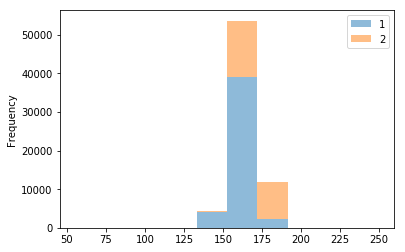

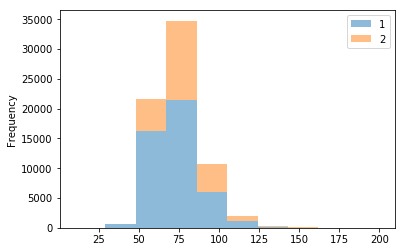

In [4]:



df4 = pd.DataFrame({'1': df[df['gender'] == 1]['height'], '2': df[df['gender'] == 2]['height']}, columns=['1', '2'])
plt.figure();
df4.plot.hist(alpha=0.5, stacked=True)


df5 = pd.DataFrame({'1': df[df['gender'] == 1]['weight'], '2': df[df['gender'] == 2]['weight']}, columns=['1', '2'])
plt.figure();
df5.plot.hist(alpha=0.5, stacked=True)

In [5]:
df.groupby(['gender'])['height'].agg([np.mean, np.std])

,mean,std
gender,,
1,161.355612,7.052726
2,169.947895,7.228895


In [6]:
df['sex'] = df['gender'].map(lambda x: 'm' if x == 2 else 'f')


df['sex'].value_counts()

f    45530
m    24470
Name: sex, dtype: int64

**<font color='red'>Вопрос 2 (1 балл).</font> Кто в среднем реже указывает, что употребляет алкоголь – мужчины или женщины?**

**<font color='red'>Варианты:</font>**
- мужчины 
- женщины

alco,0,1,All
sex,,,
f,0.633843,0.016586,0.650429
m,0.312386,0.037186,0.349571
All,0.946229,0.053771,1.000000


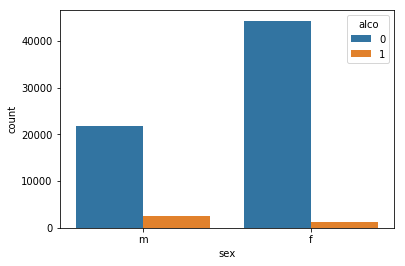

In [7]:

sns.countplot(x='sex', hue='alco', data=df);

pd.crosstab(df['sex'], df['alco'], normalize=True, margins=True)

In [8]:
df.groupby(['sex'])['alco'].agg([np.mean, np.std])

,mean,std
sex,,
f,0.025500,0.157639
m,0.106375,0.308323


**<font color='red'>Вопрос 3 (1 балл).</font> Во сколько раз (округленно, `round`) процент курящих среди мужчин больше, чем процент курящих среди женщин (по крайней мере, по этим анкетным данным)?**

**<font color='red'>Варианты:</font>**
- 4
- 8
- 12
- 16

,mean,std
sex,,
f,0.017856,0.132431
m,0.218880,0.413496


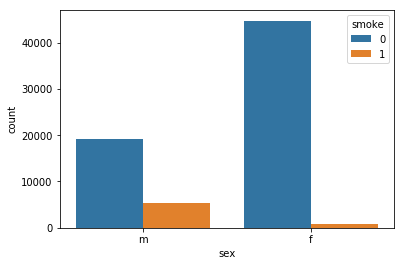

In [9]:
sns.countplot(x='sex', hue='smoke', data=df);


df.groupby(['sex'])['smoke'].agg([np.mean, np.std])

In [10]:
round(df[(df['sex'] == 'm')]['smoke'].mean() / df[(df['sex'] == 'f')]['smoke'].mean())

12.0

In [11]:
fsp = len(df[(df['sex'] == 'f') & df['smoke'] == 1]) * 100 / len(df[(df['sex'] == 'f')])
msp = len(df[(df['sex'] == 'm') & df['smoke'] == 1]) * 100 / len(df[(df['sex'] == 'm')])
msp/fsp

12.257833097333835

**<font color='red'>Вопрос 4 (1 балл).</font> Вы наверняка заметили, что значения возраста какие-то странные. Догадайтесь, в чём здесь измеряется возраст, и ответьте, на сколько месяцев (примерно) отличаются медианные значения возраста курящих и некурящих.**

**<font color='red'>Варианты:</font>**
- 10
- 15
- 20
- 25

In [12]:


df.groupby(['smoke'])['age'].describe(percentiles=[])


,count,mean,std,min,50%,max
smoke,,,,,,
0,63831.0,19505.400730,2461.594119,10798.0,19722.0,23713.0
1,6169.0,19090.836927,2494.022269,14292.0,19125.0,23687.0


In [13]:

(df[(df['smoke'] == 0)]['age'].median() - df[(df['smoke'] == 1)]['age'].median()) / 30


19.9

**<font color='red'>Вопрос 5 (2 балла).</font> В [статье](https://ru.wikipedia.org/wiki/Сердечно-сосудистый_риск) на Википедии про сердечно-сосудистый риск показана шкала SCORE для расчёта риска смерти от сердечно-сосудистого заболевания в ближайшие 10 лет. Вот она:**
<img src='https://habrastorage.org/webt/gg/38/vf/gg38vfl5ql8obqjmlsvt9es76p8.png' width=70%>

Давайте посмотрим на правый верхний прямоугольник, отображающий сегмент курящих мужчин в возрасте от 60 до 64 лет включительно. (Неочевидно, но тут для возраста и давления цифры означают верхнюю границу, и она не включается).

Видим 9-ку в левом нижнем углу этого прямоугольника и 47 – в правом верхнем. То есть если при этом систолическое (т.е. верхнее) артериальное давление – меньше 120 мм рт.ст., а уровень холестерина – 4 ммоль/л, то риск ССЗ оценивается примерно в 5 раз ниже, чем если бы давление лежало в интервале [160, 180), а холестерина было бы 8 ммоль/л.

Давайте посчитаем аналогичное значение, но на наших данных. 

Уточнения:
- Создайте новый признак ``age_years`` – возраст в годах, округлив до целых (`round`). Для данного примера отберите курящих мужчин от 60 до 64 лет включительно
- Категории уровня холестрина на рисунке и в наших данных отличаются. Отображение значений на картинке в значения признака ``cholesterol`` следующее: 4 ммоль/л $\rightarrow$ 1, 5-7 ммоль/л $\rightarrow$ 2, 8 ммоль/л $\rightarrow$ 3.
- Интересуют 2 подвыборки курящих мужчин возраста от 60 до 64 лет включительно: первая с верхним артериальным давлением строго меньше 120 мм рт.ст. и концентрацией холестерина – 4 ммоль/л, а вторая – с верхним артериальным давлением от 160 (включительно) до 180 мм рт.ст. (не включительно) и концентрацией холестерина – 8 ммоль/л.

Во сколько раз (округленно, `round`) отличаются доли больных людей (согласно целевому признаку, `cardio`) в этих двух подвыборках? Посчитайте на наших данных.

**<font color='red'>Варианты:</font>**
- 2
- 3
- 4
- 5

In [33]:

df['age_years'] = df['age'].apply(lambda age: round(age/365.25))
df = df[(df['sex'] == 'm') & (df['smoke'] == 1)]
g1 = [ca for (ag, ch, ah, ca) 
 in list(zip(df['age_years'], df['cholesterol'], df['ap_hi'], df['cardio'])) 
 if (ag >= 60) & (ag < 65) & (ah < 120) & (ch == 1)]


g2 = [ca for (ag, ch, ah, ca) 
 in list(zip(df['age_years'], df['cholesterol'], df['ap_hi'], df['cardio'])) 
 if (ag >= 60) & (ag < 65) & (ah >= 160) & (ah < 180) & (ch == 3)]

(np.mean(g2)/np.mean(g1))

#gg1 = sum(g1) *100 / len(g1)
#gg2 = sum(g2) *100 / len(g2)
#round(gg2/gg1)

3.281818181818182

**<font color='red'>Вопрос 6 (2 балла).</font> Постройте новый признак – BMI ([Body Mass Index](https://en.wikipedia.org/wiki/Body_mass_index)). Для этого надо вес в килограммах поделить на квадрат роста в метрах. Нормальными считаются значения BMI от 18.5 до 25. Выберите верные утверждения.**

**<font color='red'>Утверждения:</font>**
- Медианный BMI по выборке превышает норму
- У женщин в среднем BMI ниже, чем у мужчин
- У здоровых в среднем BMI выше, чем у больных
- В сегменте здоровых и непьющих мужчин в среднем BMI ближе к норме, чем в сегменте здоровых и непьющих женщин

In [15]:
df['bmi'] = df['weight'] / ((df['height'] ** 2) / 10000)
#df.describe()
#df.groupby('sex')['bmi'].describe()
#df.groupby('cardio')['bmi'].describe()
df.groupby(['sex', 'alco', 'cardio'])['bmi'].describe()

count       mean       std        min        25%  \
sex alco cardio                                                       
f   0    0       22332.0  26.845407  5.843207   9.331007  23.437500   
         1       22037.0  29.052771  6.901441   8.001829  24.560326   
    1    0         582.0  28.671457  7.045645  16.665936  24.349609   
         1         579.0  30.812347  6.045829  17.709563  26.124625   
m   0    0       10748.0  25.872638  4.918895  14.609204  23.306680   
         1       11119.0  27.522450  5.247496   3.471784  24.221453   
    1    0        1359.0  26.097220  5.404698   7.022248  23.229444   
         1        1244.0  28.226569  4.759114  17.301038  24.966212   

                       50%        75%         max  
sex alco cardio                                    
f   0    0       25.654372  29.384676  237.768633  
         1       27.885187  32.388355  298.666667  
    1    0       27.885187  31.815011  133.131378  
         1       30.110991  34.513620   55.459105  
m   0    0       25.102391  27.755102  170.414201  
         1       26.674874  30.040816  180.678074  
    1    0       25.351541  28.269909  133.660058  
         1       27.530797  30.801521   56.481481

**<font color='red'>Вопрос 7 (2 балла).</font> ** Можно заметить, что данные не особо-то чистые, много в них всякой "грязи" и неточностей. Еще лучше мы это увидим, когда обсудим визуализацию данных.

Отфильтруйте следующие сегменты пациентов (считаем это ошибками в данных)
- указанное нижнее значение артериального давления строго выше верхнего
- рост строго меньше 2.5%-перцентили или строго больше 97.5%-перцентили (используйте `pd.Series.quantile`, если не знаете, что это такое – прочитайте)
- вес строго меньше 2.5%-перцентили или строго больше 97.5%-перцентили

Этот вовсе не вся чистка данных, которую можно было проделать, но пока остановимся на этом.

Сколько процентов данных (округленно, `round`) мы выбросили?

**<font color='red'>Варианты:</font>**
- 8
- 9
- 10
- 11

In [16]:
hl, hh = df['height'].quantile([.025, .975])
wl, wh = df['weight'].quantile([.025, .975])
df1 = df[
    (df['ap_hi'] < df['ap_lo']) | 
    (~df['height'].between(hl, hh)) |
    (~df['weight'].between(wl, wh))]
df2 = df[
    (df['ap_hi'] >= df['ap_lo']) & 
    (df['height'] >= df['height'].quantile(.025)) & 
    (df['height'] <= df['height'].quantile(.975)) &
    (df['weight'] >= df['weight'].quantile(.025)) & 
    (df['weight'] <= df['weight'].quantile(.975))]
len(df) / (len(df) - len(df2))
round(len(df1) * 100 / len(df))

10